https://java2blog.com/cv2-findcontours-python/

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

threeplusfive = cv2.imread('threeplusfive.jpg')
nineminuseight = cv2.imread('nineminuseight.jpg')


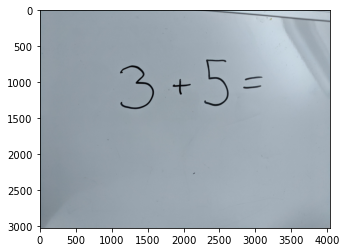

In [2]:
plt.imshow(threeplusfive)

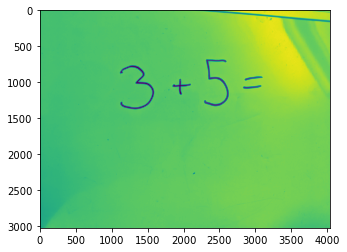

In [3]:
threeplusfive_blurred = cv2.GaussianBlur(cv2.cvtColor(threeplusfive, cv2.COLOR_BGR2GRAY),(5,5),0)
nineminuseight_blurred = cv2.GaussianBlur(cv2.cvtColor(nineminuseight, cv2.COLOR_BGR2GRAY),(5,5),0)
plt.imshow(threeplusfive_blurred)

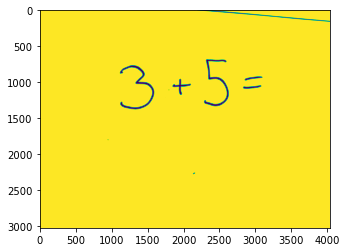

In [4]:
ret3,th3 = cv2.threshold(threeplusfive_blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret9,th9 = cv2.threshold(nineminuseight_blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3)

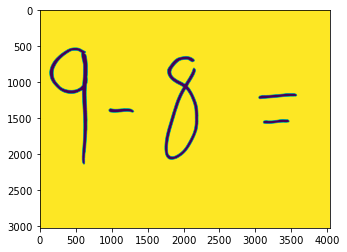

In [5]:
plt.imshow(th9)

In [6]:
output = cv2.connectedComponentsWithStats(th3, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

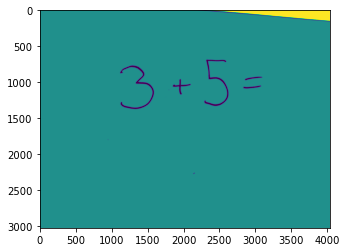

In [7]:
plt.imshow(labels)

In [8]:
output = cv2.connectedComponentsWithStats(th9, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

0 264880 2312 0 1720 154
1 11592 2825 1046 252 46
2 55626 1844 956 254 219
3 13284 2847 923 246 54
4 289750 1112 767 475 610
5 221309 2282 685 341 649


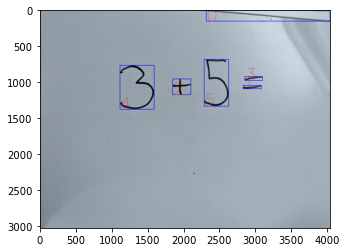

In [9]:
new, contours, hierarchy = cv2.findContours(th3, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

img_h, img_w = th3.shape

digitCnts = []
areas = []
final = threeplusfive.copy()    
# print(contours)
# loop over the digit area candidates
counter = 0
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    if w * h > .5 * img_h*img_w or w*h<1000:
        continue
    print(counter, w*h, x, y, w, h)
    areas.append(w*h)
    # if the contour is sufficiently large, it must be a digit
#     if (w >= 20 and w <= 290) and h >= (th3.shape[0]>>1)-15:
    x1 = x+w
    y1 = y+h
    xmid = x + w//2
    ymid = y + w//2
    digitCnts.append([x,x1,y,y1])
        #print(x,x1,y,y1)
        # Drawing the selected contour on the original image
    cv2.rectangle(final,(x,y),(x1,y1),(0, 0, 255), 5)
    final = cv2.putText(final, f'{counter}', (x, y+h), cv2.FONT_HERSHEY_SIMPLEX, 8, (255, 0, 0), 2, cv2.LINE_AA)
    counter += 1

plt.imshow(final)


0 358871 1775 1097 383 937
1 231288 185 561 419 552
2 21476 3103 1518 364 59
3 19768 955 1366 353 56
4 41118 3039 1157 534 77
5 669211 1734 642 467 1433
6 859689 132 523 531 1619


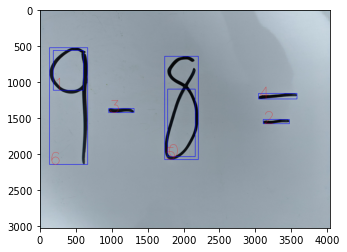

In [13]:
new, contours, hierarchy = cv2.findContours(th9, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

img_h, img_w = th9.shape

digitCnts = []
areas = []
final = nineminuseight.copy()    
# print(contours)
# loop over the digit area candidates
counter = 0
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    if w * h > .5 * img_h*img_w or w*h<1000:
        continue
    print(counter, w*h, x, y, w, h)
    areas.append(w*h)
    # if the contour is sufficiently large, it must be a digit
#     if (w >= 20 and w <= 290) and h >= (th3.shape[0]>>1)-15:
    x1 = x+w
    y1 = y+h
    xmid = x + w//2
    ymid = y + w//2
    digitCnts.append([x,x1,y,y1])
        #print(x,x1,y,y1)
        # Drawing the selected contour on the original image
    cv2.rectangle(final,(x,y),(x1,y1),(0, 0, 255), 5)
    final = cv2.putText(final, f'{counter}', (x, y+h), cv2.FONT_HERSHEY_SIMPLEX, 8, (255, 0, 0), 2, cv2.LINE_AA)
    counter += 1

plt.imshow(final)


(array([3., 0., 1., 0., 1., 0., 0., 1., 0., 1.]),
 array([ 19768. , 103760.1, 187752.2, 271744.3, 355736.4, 439728.5,
        523720.6, 607712.7, 691704.8, 775696.9, 859689. ]),
 <BarContainer object of 10 artists>)

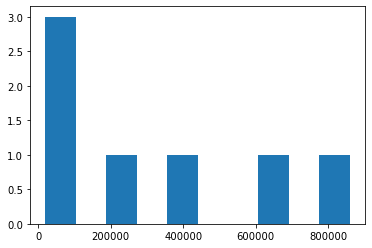

In [11]:
plt.hist(areas)

In [12]:
output = cv2.connectedComponentsWithStats(th9, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output